# Punto 1 (Exploración técnicas de Clustering)

## Introducción al Clustering y K-Means
En el presente notebook se exploran las técnicas de clustering, se implementará el algoritmo K-means desde cero sin utilizar librerías especializadas para clustering (pero sí para manejo de datos y visualización). Se utilizarán **datos sintéticos** con **5 clusters** en **2D y 3D**, cuyas **etiquetas verdaderas** son conocidas. Esto permitirá **comparar los resultados del algoritmo** con las etiquetas originales.
### ¿Qué es el Clustering?
El **Clustering** es una técnica de **aprendizaje no supervisado** que consiste en **agrupar datos** en **conjuntos** o **clusters** basándose en su **similitud**.  
El objetivo es que los **puntos dentro de un mismo cluster** sean **lo más similares posible** entre sí, mientras que los **puntos en clusters diferentes** sean **lo más diferentes posible**.  

El clustering se utiliza en diversos campos, como:
- **Análisis de clientes**: Para agrupar clientes con comportamientos de compra similares.  
- **Segmentación de imágenes**: Para identificar regiones similares en una imagen.  
- **Agrupación de documentos**: Para organizar grandes volúmenes de texto en temas o categorías.

---

### ¿Qué es K-Means?
**K-Means** es uno de los algoritmos de **clustering** más **populares** y **simples**.  
Funciona agrupando los datos en **K clusters**, donde **K** es un número definido previamente.  
El objetivo de K-Means es **minimizar la varianza intra-cluster** y **maximizar la separación inter-cluster**.

#### **¿Cómo funciona?**  
1. **Inicialización**: Se eligen aleatoriamente **K centroides** (uno por cada cluster).  
2. **Asignación de puntos**: Cada punto de datos se asigna al **centroide más cercano**.  
3. **Recalculación de centroides**: Se **recalcula la posición** de cada centroide como la **media** de los puntos asignados a su cluster.  
4. **Repetición**: Los pasos 2 y 3 se **repiten hasta converger**, es decir, hasta que se supere la cantidad de iteraciones máximas o que ya no exista un cambio significitativo entre el cálculo de los centroides.

### **Características de K-Means**:  
- Es **rápido y eficiente** en datasets grandes.  
- Se requiere **especificar el número de clusters (K)** de antemano.  
- Utiliza una **métrica de distancia** (usualmente **Euclidiana**) para asignar puntos a los clusters.  
- Puede **converger a mínimos locales**, dependiendo de la **inicialización de los centroides**.

## Importación librerías
En este proyecto se hará uso de las librerías indicadas en el documento _requirements.txt_ para la gestión de datos y visualización. A continuación se importan las librerías necesarias (pandas, numpy, matplotlib, scipy, entre otras).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Lectura de datos
Se hará la lectura de dos datasets de datos sintéticos, uno en 2D y otro en 3D (_data_2d_ y _data_3d_ respectivamente).

In [2]:
# Lectura de datos 2d
data_2d = pd.read_csv('../data/data_2d.csv')
data_2d.head()

,x,y,label
0,-0.542815,0.498673,1
1,0.141489,-0.753147,1
2,-0.289300,0.825718,1
3,-1.213340,-0.214456,1
4,0.632968,-0.433370,1


In [3]:
# Lectura de datos 3d
data_3d = pd.read_csv('../data/data_3d.csv')
data_3d.head()

,x,y,z,label
0,-0.374414,0.283797,0.359075,1
1,-0.499690,0.237449,-0.934250,1
2,-0.101329,-0.567124,-0.403850,1
3,-0.638039,0.276813,0.276937,1
4,-0.345600,0.187791,0.130636,1


## Estudio estadístico de los datos
Se realizará un breve estudio estadístico de los datos, para ello se utilizará la función _describe()_ de pandas.

In [4]:
# Estudio estadístico de los datos 2d
print("Estudio estadistico de los datos 2D:")
data_2d.describe()

Estudio estadistico de los datos 2D:


,x,y,label
count,500.000000,500.000000,500.00000
mean,-0.021084,-0.018481,3.00000
std,2.709409,2.739144,1.41563
min,-4.583528,-4.136309,1.00000
25%,-2.881481,-2.852890,2.00000
50%,0.063694,-0.063037,3.00000
75%,2.794664,2.877321,4.00000
max,4.166031,4.479313,5.00000


In [5]:
# Estudio estadístico de los datos 3d
print("Estudio estadistico de los datos 3D:")
data_3d.describe()

Estudio estadistico de los datos 3D:


,x,y,z,label
count,500.000000,500.000000,500.000000,500.00000
mean,0.007135,0.012954,1.210683,3.00000
std,2.767796,2.706724,1.549598,1.41563
min,-4.076058,-4.533494,-1.900689,1.00000
25%,-2.846464,-2.810216,-0.068054,2.00000
50%,0.025454,0.098319,0.415523,3.00000
75%,2.903804,2.814452,2.868339,4.00000
max,4.058567,4.185694,4.135517,5.00000


## Visualización de los datos
Se procederá a visualizar los datos en 2D y 3D, para ello se utilizará la librería matplotlib y toolkits de mplot3d.

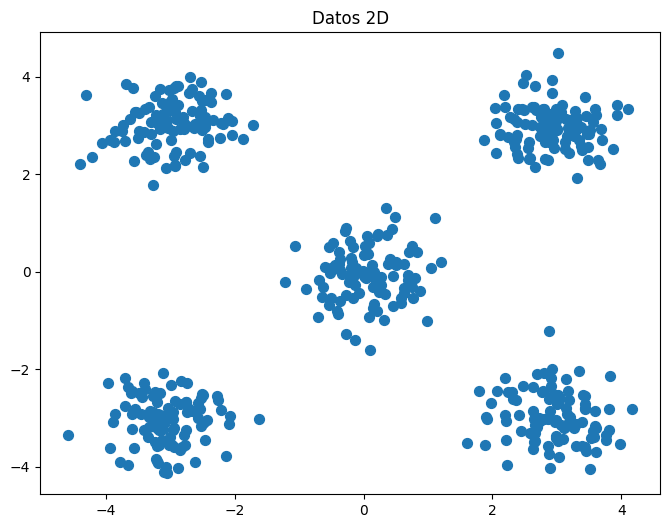

In [6]:
# Gráfica de los datos 2D
plt.figure(figsize=(8, 6))
plt.scatter(data_2d["x"], data_2d["y"], s=50)
plt.title("Datos 2D")
plt.show()

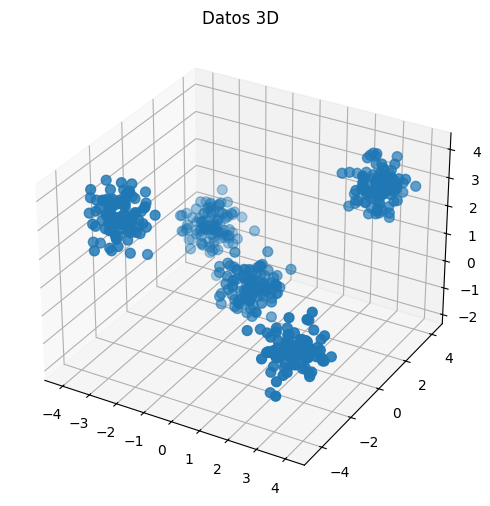

In [7]:
# Gráfica de los datos 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d["x"], data_3d["y"], data_3d["z"], s=50)
ax.set_title("Datos 3D")
plt.show()

### Preprocesamiento de los Datos
Se procederá a limpiar los datos, eliminando columnas innecesarias para el entrenamiento (_labels_) y asignando el nuevo dataFrame sin dicha columna a `data_to_find_2d` y `data_to_find_3d` respectivamente.

In [8]:
# Preprocessing the 2D data excluyendo la última columna
data_2d_to_fit = data_2d.iloc[:, :-1]

data_2d_to_fit.head()

,x,y
0,-0.542815,0.498673
1,0.141489,-0.753147
2,-0.289300,0.825718
3,-1.213340,-0.214456
4,0.632968,-0.433370


In [9]:
# Preprocessing the 3D data excluyendo la última columna
data_3d_to_fit = data_3d.iloc[:, :-1]

data_3d_to_fit.head()

,x,y,z
0,-0.374414,0.283797,0.359075
1,-0.499690,0.237449,-0.934250
2,-0.101329,-0.567124,-0.403850
3,-0.638039,0.276813,0.276937
4,-0.345600,0.187791,0.130636


---
## Implementación de K-Means

A continuación se usará el algoritmo K-Means implementado, el cual forma parte de un paquete diseñado para incluir utilidades básicas relacionadas con el análisis de datos y clustering. Este paquete incluye varias funcionalidades útiles distribuidas en diferentes módulos:

- **kmeans.py**: Contiene la implementación de la clase `KMeans`, la cual es el núcleo del algoritmo. Esta clase permite realizar clustering utilizando un enfoque flexible con múltiples funciones de distancia. Se destacan las siguientes características:
  - `n_clusters`: Número de clusters a formar.
  - `max_iter`: Número máximo de iteraciones para el algoritmo.
  - `tol`: Tolerancia para la convergencia.
  - `distance_func`: Función personalizada para calcular la distancia entre puntos.
  - `random_state`: Semilla para la inicialización de los centroides, permitiendo reproducibilidad.

  La clase `KMeans` implementa métodos esenciales como:
  - `fit(X)`: Ajusta el modelo a los datos de entrada `X`.
  - `predict(X)`: Asigna etiquetas de cluster a nuevos datos.
  - `inertia(X)`: Calcula la inercia del modelo, es decir, la suma de distancias al cuadrado de los puntos a sus centroides correspondientes.

- **miscellaneous.py**: Incluye funciones para calcular diversas normas de distancia, como:
  - `euclidean_norm`: Distancia euclidiana.
  - `manhattan_norm`: Distancia de Manhattan.
  - `chebyshev_norm`: Distancia de Chebyshev.
  - `minkowski_norm`: Generalización de la distancia euclidiana.
  - `mahalanobis_norm`: Distancia de Mahalanobis.

- **metrics.py**: Contiene métricas y métodos de evaluación, como el **Método del Codo** (`elbow_method`), para seleccionar el número óptimo de clusters.

- **visualize.py**: Incluye funciones de visualización para analizar los resultados de clustering:
  - `plot_elbow_method`: Gráfica del método del codo.
  - `plot_clusters_2d`: Visualiza clusters en 2D.
  - `plot_clusters_3d`: Visualiza clusters en 3D.

### Inicialización de Semilla Aleatoria y Creación del Objeto KMeans

Para asegurar la reproducibilidad de los resultados, se inicializa una semilla aleatoria fija utilizando el parámetro `random_state` al crear el objeto de la clase `KMeans`. Esto garantiza que los centroides iniciales sean siempre los mismos en cada ejecución.

In [22]:
# Ahora puedes importar el módulo KMeans
from src.kmeans import KMeans

In [21]:
# Inicialización de semilla aleatoria fija
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [12]:
# Creación del objeto KMeans para 2 dimensiones con 5 clusters.
kmeans2d = KMeans(n_clusters=5, random_state=RANDOM_SEED)

In [13]:
# Creación del objeto KMeans para 3 dimensiones con 5 clusters.
kmeans3d = KMeans(n_clusters=5, random_state=RANDOM_SEED)

### Ajuste del Modelo KMeans a los Datos

El algoritmo K-Means es un método de **clustering no supervisado** que agrupa datos en un número específico de clusters (`n_clusters`). La implementación utilizada en esta función `fit` sigue los siguientes pasos:

1. **Inicialización de Centroides**: 
   Se inicializan los centroides de forma aleatoria dentro del rango de los datos utilizando `_initialize_centroids`.

2. **Asignación de Clusters**:
   Cada punto de datos se asigna al cluster cuyo centroide está más cercano, utilizando `_assign_clusters`.

3. **Recalculo de Centroides**:
   Se recalculan los centroides como el promedio de los puntos asignados a cada cluster con `_compute_centroids`.

4. **Criterio de Convergencia**:
   Se calcula el cambio promedio en la posición de los centroides (`change`) y el algoritmo continúa iterando hasta que:
   - El cambio promedio sea menor que un valor de tolerancia (`tol`).
   - Se alcance el número máximo de iteraciones (`max_iter`).

Este proceso garantiza que los clusters se ajusten a los datos minimizando la **suma de distancias al cuadrado** entre los puntos y sus centroides correspondientes.

In [14]:
# Ajuste del modelo KMeans a los datos 2D
kmeans2d.fit(data_2d_to_fit)

In [15]:
# Ajuste del modelo KMeans a los datos 3D
kmeans3d.fit(data_3d_to_fit)

## Visualización y Métricas

En esta sección, se analizan los clusters obtenidas mediante visualizaciones y métricas de evaluación.

In [16]:
from src.visualize import plot_kmeans_clusters

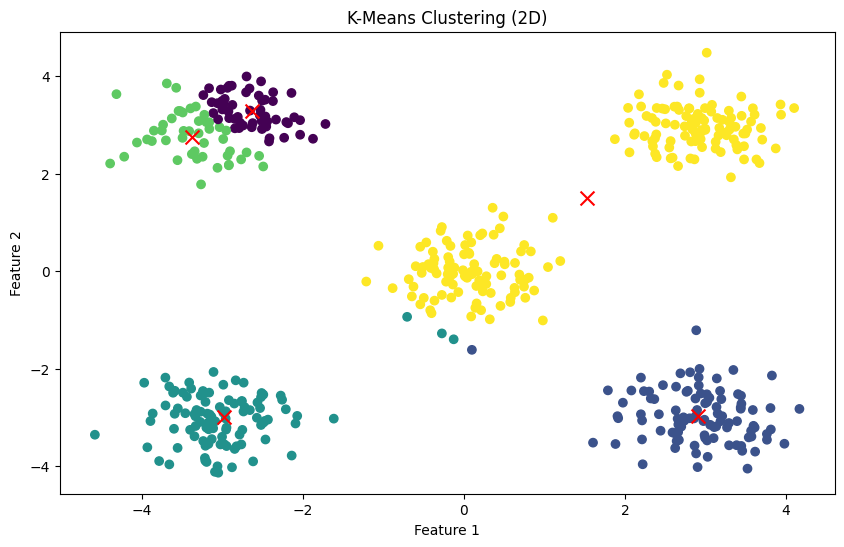

In [17]:
# Visualización de los clusters en 2D
plot_kmeans_clusters(data_2d_to_fit, kmeans2d)

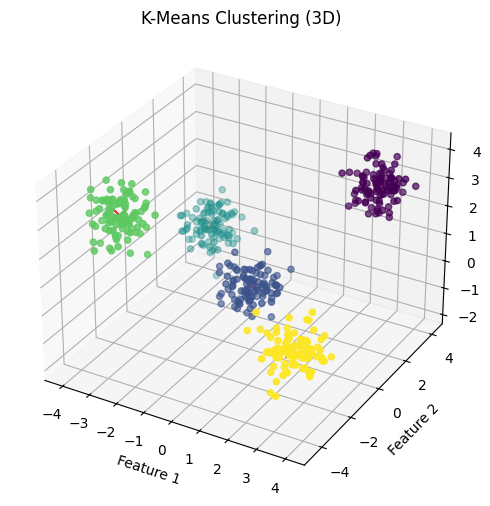

In [18]:
# Visualización de los clusters en 3D
plot_kmeans_clusters(data_3d_to_fit, kmeans3d)

### Inercia
La **inercia** es una métrica que mide la **suma de las distancias al cuadrado** entre los puntos de datos y sus centroides asignados. Se calcula como:

$$
\text{Inercia} = \sum_{i=1}^{N} \| x_i - c_{y_i} \|^2
$$

donde:
- $x_i$ es un punto de datos.
- $c_{y_i}$ es el centroide del cluster al que pertenece \( x_i \).
- $N$ es el número total de puntos.

Una menor inercia indica clusters más compactos y cercanos a sus centroides, lo cual generalmente refleja una mejor agrupación.

### Método del Codo (Elbow Method)
El **método del codo** es una técnica utilizada para determinar el número óptimo de clusters (`n_clusters`) en K-Means. Consiste en:
1. Entrenar el modelo para diferentes valores de `n_clusters`.
2. Calcular la inercia para cada valor.
3. Graficar la inercia en función de `n_clusters`.

Se observa una disminución rápida en la inercia al aumentar el número de clusters, seguida de un punto en el cual la reducción se vuelve más lenta. Este punto, que tiene forma de **"codo"** en la gráfica, representa el número óptimo de clusters, ya que agregar más clusters no mejora significativamente la inercia.

Esta técnica ayuda a **balancear la precisión del modelo** con la **complejidad** y evita el sobreajuste.